In [1]:
from GyroSolver import *
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [17]:
g = 9.81           # m/s^2
m = 0.375          # kg
J3 = 0.000055      # kg.m^2
J1 = 0.000055      # kg.m^2
h = 31.25 * 1e-3   # m
x0 =  0.1
f_exc = 1.059
p = np.pi

params = [g, m, h, J1, J3, x0, p, f_exc]
CI = [np.pi / 6, 0, 0, 0, 0, 2 * np.pi * 50]

In [18]:
Gyro_Carac_Values(params, CI)

Larmor Pulsation (th) :               +6.653
Larmor Frequency (th) :               +1.059
Larmor Period (th) :               +0.944 

Rabi Pulsation (th) :               +1.501
Rabi Period (th) :               +4.185
Temps de montée (th) :               +2.092 

Rapport des pulsations Larmor/Rabi :               +4.431 

Rapport Approx Gyroscopique :             +932.056 



In [19]:
def Solve_Gyro_Fast(t1, t2, CI, params, solving_method='RK23', forcing='XY'):
    
    g, m, h, J1, J3, x0, p, f = params
    w = 2 * np.pi * f
    J1_ = J1 + m * (h**2)
    K = m * h * x0 * (w**2)
    p_psi = (CI[-1] + CI[-3] * np.sin(CI[0])**2) * J3
    ans = solve_ivp(dSdt_IVP, t_span=(t1, t2), y0=CI, 
                    args=(g, m, h, J1, J3, x0, p, w, J1_, K, p_psi, forcing), method=solving_method, 
                 max_step=0.0001, first_step =  0.0001)
    the_t, phi_t, psi_t, the_t_d, phi_t_d, psi_t_d = ans.y
    t = ans.t
    
    return t, the_t, phi_t, psi_t, the_t_d, phi_t_d, psi_t_d



In [22]:
#t, the_free, phi_free, psi_free, the_d_free, phi_d_free, psi_d_free, ans = Solve_Gyro(0, 10, CI, params, 
#                                        solving_method='RK45', forcing='FREE', nb_points=10000000)


t1 = time()

t, the_free, phi_free, psi_free, the_d_free, phi_d_free, psi_d_free = Solve_Gyro_Fast(0, 30, CI, params, 
                                    solving_method='RK23', forcing='X')


p_the_free, p_phi_free, p_psi_free = Conjugated_Momentums(the_free, phi_free, 
                                    psi_free, the_d_free, phi_d_free, psi_d_free, params)

t2 = time()
print(t2 - t1)

19.123162984848022


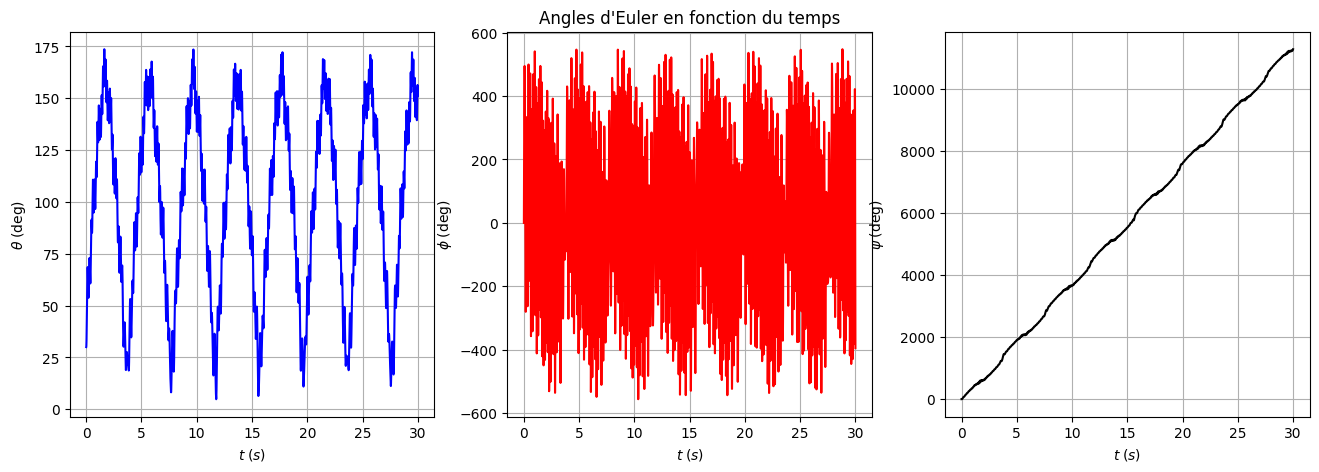

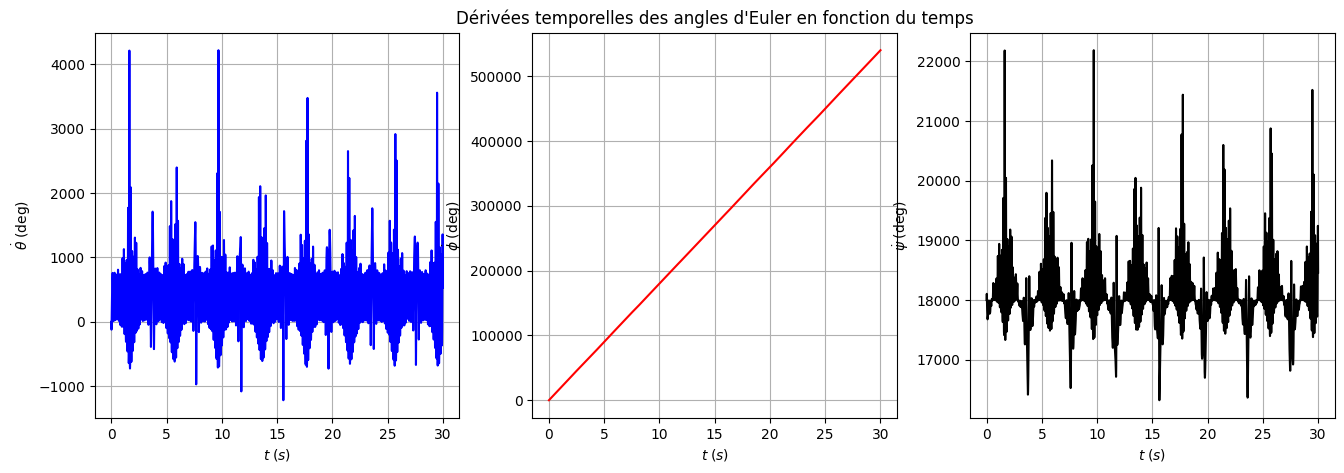

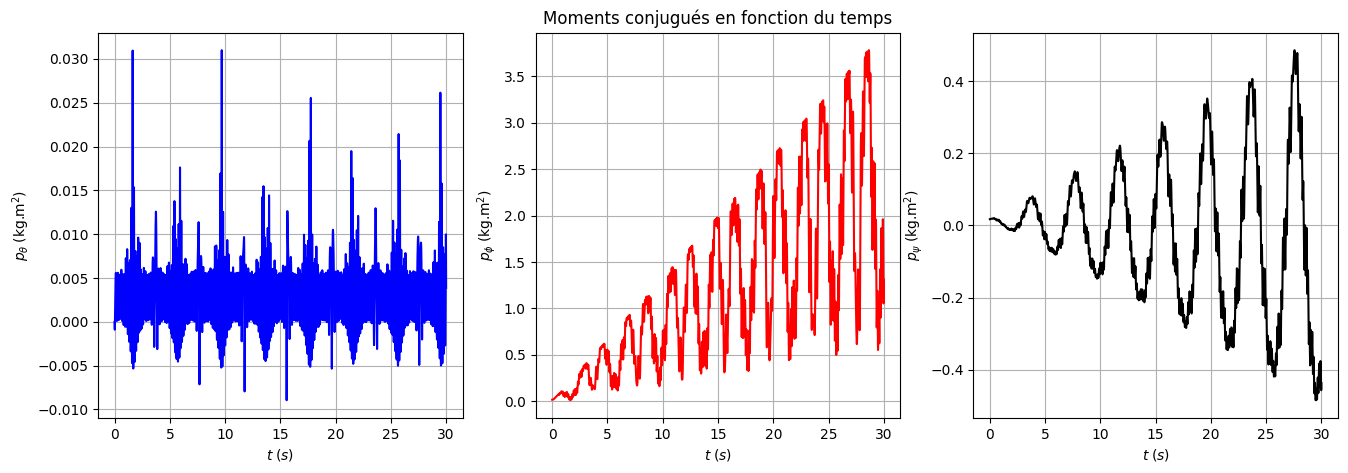

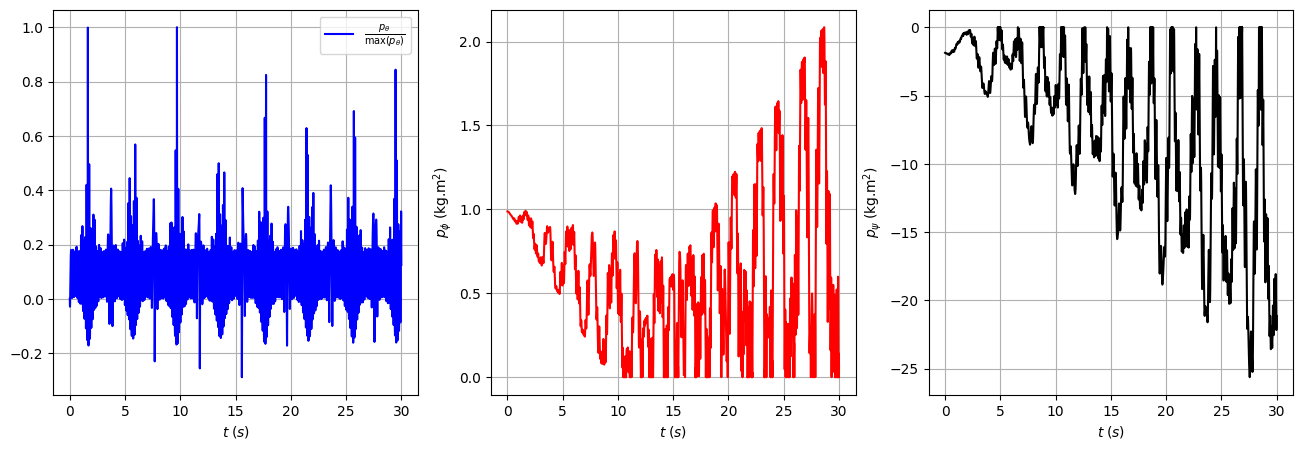

In [23]:
Plot_Gyro_Angles(t, the_free, phi_free, psi_free)

Plot_Gyro_Speed_Angles(t, the_d_free, phi_d_free, psi_d_free)

Plot_Gyro_Momentum(t, p_the_free, p_phi_free, p_psi_free)

Plot_Normalized_Gyro_Momentum(t, p_the_free, p_phi_free, p_psi_free)


In [59]:
len(t)

4357

In [13]:
def Plot_Normalized_Gyro_Momentum(t, p_the, p_phi, p_psi):
    '''Sam's work.'''

    norm_p_the = p_the / np.max(p_the)
    norm_p_phi = np.abs(p_phi - np.mean(p_phi)) / np.mean(p_phi)
    norm_p_psi = np.abs(p_psi - np.mean(p_psi)) / np.mean(p_psi)
    
    plt.figure(figsize=[16, 5])
    plt.subplot(1,3,1)
    plt.grid()
    plt.plot(t, norm_p_the, 'b', label=r'$\frac{p_\theta}{\mathrm{max}(p_\theta)}$')
    plt.xlabel(r'$t \;(s)$')
    plt.legend()
    plt.ylim([-1.5, 1.5])
    #plt.ylabel(r'$p_\theta \; (\text{kg.m}^2)$')
    
    plt.subplot(1,3,2)
    plt.grid()
    #plt.title(r"Moments conjugués en fonction du temps")
    plt.plot(t, norm_p_phi, 'r')
    plt.xlabel(r'$t \;(s)$')
    plt.ylabel(r'$p_\phi \; (\text{kg.m}^2)$')
    
    plt.subplot(1,3,3)
    plt.grid()
    plt.plot(t, norm_p_psi, 'k')
    plt.xlabel(r'$t \;(s)$')
    plt.ylabel(r'$p_\psi \; (\text{kg.m}^2)$')
    plt.show()

    return None